In [4]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

/home/codespace/.local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


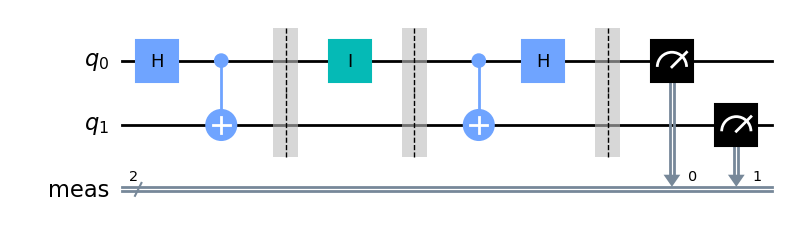

In [5]:
circuit = QuantumCircuit(2)

# Prepare the Bell state and distribute qubits
circuit.h(0)
circuit.cx(0, 1)

circuit.barrier()

# Olivia encodes her message and transmits her qubit to Barron
match message := '00':  # the message
    case '00':
        circuit.id(0)
    case '01':
        circuit.z(0)
    case '10':
        circuit.x(0)
    case '11':
        circuit.z(0)
        circuit.x(0)

circuit.barrier()

# Barron decodes Olivia's message
circuit.cx(0, 1)
circuit.h(0)

# Barron measures the qubits to read Olivia's message
circuit.measure_all()
circuit.draw(output='mpl')

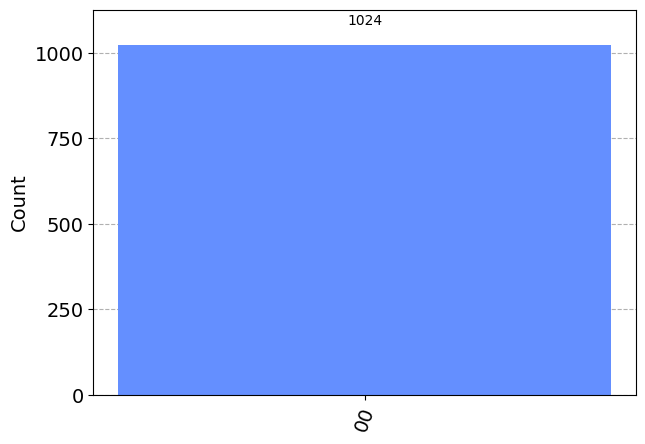

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts())